# Neural Network - supervised

## import libraries

In [69]:
import pandas as pd
import numpy as np
from tensorflow import keras

import matplotlib.pyplot as plt

## import dataset

In [70]:
# The Fashion MNIST data set contains 70,000 grayscale images in 10 categories
# The images show individual articles of clothing at low resolution (28 by 28 pixels)

(X_train,y_train), (X_test,y_test) = keras.datasets.fashion_mnist.load_data()

#when using a convolutional layer as the first layer to your model you need to reshape the data to 
# (n_samples, x_shape, y_shape, channels)
X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

#normalise the datasets
X_train = X_train/255.0
X_test = X_test/255.0

#y is a categorical variable, the model can't handle that. So we need to make a dummy matrix of it
y_train_dummy = keras.utils.to_categorical(y_train)
y_test_dummy = keras.utils.to_categorical(y_test)

## create neural network

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
                                  
model.add(Flatten())
model.add(Dense(64))
                                  
model.add(Dense(10))
model.add(Activation('softmax'))
                                  
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model.fit(X_train, y_train_dummy, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 611us/sample - loss: 0.4558 - accuracy: 0.8354
Epoch 2/10
60000/60000 [==============================] - 42s 702us/sample - loss: 0.3135 - accuracy: 0.8873
Epoch 3/10
60000/60000 [==============================] - 44s 736us/sample - loss: 0.2736 - accuracy: 0.9006
Epoch 4/10
60000/60000 [==============================] - 41s 685us/sample - loss: 0.2488 - accuracy: 0.9096
Epoch 5/10
60000/60000 [==============================] - 40s 660us/sample - loss: 0.2261 - accuracy: 0.9173
Epoch 6/10
60000/60000 [==============================] - 37s 614us/sample - loss: 0.2119 - accuracy: 0.9226
Epoch 7/10
60000/60000 [==============================] - 37s 609us/sample - loss: 0.1943 - accuracy: 0.9291
Epoch 8/10
60000/60000 [==============================] - 37s 616us/sample - loss: 0.1812 - accuracy: 0.9333
Epoch 9/10
60000/60000 [==============================] - 37s 616us/sample - loss: 0.1700 - accuracy: 0.9

## predicting

In [80]:
#check how well the model does on the test set
model.evaluate(X_test, y_test_dummy)
# Test loss 0.26606975694298746
# Test accuracy 0.9073    --- so slight overfitting occured

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

predicted: 9 , true value: 9


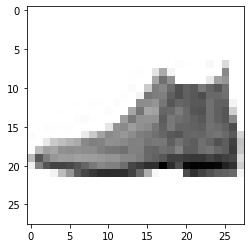

In [89]:
prediction = model.predict(X_test)
print("predicted:",np.argmax(prediction[0]),", true value:",y_test[0])

plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()